In [ ]:
# Importer les bibliothèques nécessaires
import gensim
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from gensim.scripts.glove2word2vec import glove2word2vec
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 1. Téléchargement et chargement du modèle GloVe
# Assurez-vous d'avoir un fichier GloVe pré-entraîné (ex: glove.6B.50d.txt)
glove_file = 'glove.6B.50d.txt'  # Remplacez par votre chemin
word2vec_output_file = 'content'

# Conversion du fichier GloVe en format Word2Vec
print("Conversion du fichier GloVe en format Word2Vec...")
glove2word2vec(glove_file, word2vec_output_file)

# Chargement du modèle GloVe converti
print("Chargement du modèle...")
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
print("Modèle chargé avec succès.")

Conversion du fichier GloVe en format Word2Vec...


<ipython-input-4-0a8192d77cd2>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


Chargement du modèle...
Modèle chargé avec succès.


In [ ]:
# 2. Exploration du modèle GloVe
# Affichage du vecteur pour un mot spécifique
word = "intelligence"
if word in model:
    print(f"Vecteur pour le mot '{word}':\n", model[word])
else:
    print(f"Le mot '{word}' n'est pas présent dans le vocabulaire du modèle.")

# Recherche des mots similaires
print("\nMots similaires à 'intelligence':")
similar_words = model.most_similar('intelligence', topn=5)
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

Vecteur pour le mot 'intelligence':
 [ 0.8782    -0.45171    0.96737    0.040347   0.76235   -0.63825
  0.18944   -0.26633    0.58874   -0.93608   -0.065201   0.5123
 -0.69111    0.52807   -0.71195   -0.2834    -0.34591    0.014351
  0.11763    0.59407    0.20703    0.69087    1.0855    -0.83158
 -0.35967   -2.3939    -0.88375   -0.417     -0.36717    0.58897
  2.4132    -0.74281   -0.3619    -1.9934     0.093133   0.86592
 -0.75185    0.19073   -0.54284   -0.0084839  0.57554    0.4475
  0.48515    0.054866   0.35842   -0.51698   -0.026014   1.9907
 -0.11378    0.30127  ]

Mots similaires à 'intelligence':
cia: 0.7884
pentagon: 0.7842
information: 0.7707
fbi: 0.7704
military: 0.7667


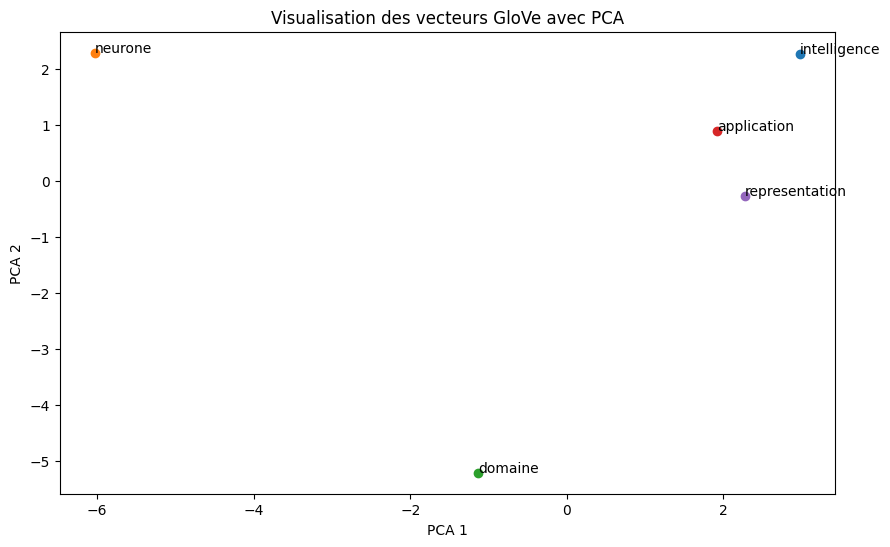

In [ ]:
# 3. Visualisation des vecteurs
# Sélection de quelques mots pour la visualisation
words = ["intelligence", "artificielle", "apprentissage", "profond", "neurone", "domaine", "application", "representation"]
valid_words = [word for word in words if word in model]
word_vectors = np.array([model[word] for word in valid_words])

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Visualisation avec matplotlib
plt.figure(figsize=(10, 6))
for i, word in enumerate(valid_words):
    if word in model:
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Visualisation des vecteurs GloVe avec PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()